# Project: NLP with Disaster Tweets - Kaggle Competition

Goal:

Predict whether a tweet refers to a real disaster or not using Natural Language Processing techniques.

In [ ]:
#Step 1: Install necessary libraries (if running on local)
# !pip install pandas numpy matplotlib seaborn nltk scikit-learn

#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, classification_report

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Step 2: Load the Data

# Load training and testing data
train_data = pd.read_csv('/content/drive/MyDrive/Kaggle Competitions/Natural Language Processing with Disaster Tweets/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Kaggle Competitions/Natural Language Processing with Disaster Tweets/test.csv')

train_data.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Training data shape: (7613, 5)
Test data shape: (3263, 4)


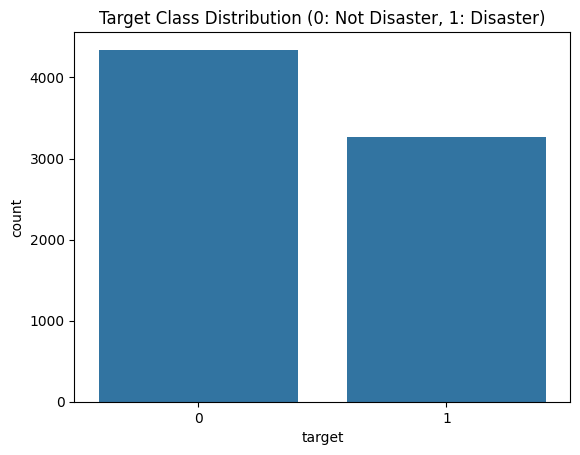

In [ ]:
# Step 3: Understand the data

print("Training data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

# Check for missing values
train_data.isnull().sum()

# Plot class distribution
sns.countplot(x='target', data=train_data)
plt.title('Target Class Distribution (0: Not Disaster, 1: Disaster)')
plt.show()


In [ ]:
#  Data Cleaning & Preprocessing

# Initialize tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove user mentions and hashtags
    text = re.sub(r'\@\w+|\#', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove stopwords and stemming
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Apply cleaning
train_data['clean_text'] = train_data['text'].apply(clean_text)
test_data['clean_text'] = test_data['text'].apply(clean_text)

train_data[['text', 'clean_text']].head(3)


,text,clean_text
0,Our Deeds are the Reason of this #earthquake M...,deed reason earthquak may allah forgiv us
1,Forest fire near La Ronge Sask. Canada,forest fire near la rong sask canada
2,All residents asked to 'shelter in place' are ...,resid ask shelter place notifi offic evacu she...


In [ ]:
# Text Vectorization (TF-IDF)


# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit on train + transform
X = tfidf.fit_transform(train_data['clean_text']).toarray()
X_test = tfidf.transform(test_data['clean_text']).toarray()

# Target variable
y = train_data['target']


In [ ]:
# Model Building

# Split data for validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Logistic Regression
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict on validation
val_preds = model.predict(X_val)

# Evaluate
f1 = f1_score(y_val, val_preds)
print(f"Validation F1 Score: {f1:.4f}")

Validation F1 Score: 0.7728


In [ ]:
# Classification report
print(classification_report(y_val, val_preds))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       869
           1       0.86      0.70      0.77       654

    accuracy                           0.82      1523
   macro avg       0.83      0.81      0.81      1523
weighted avg       0.83      0.82      0.82      1523



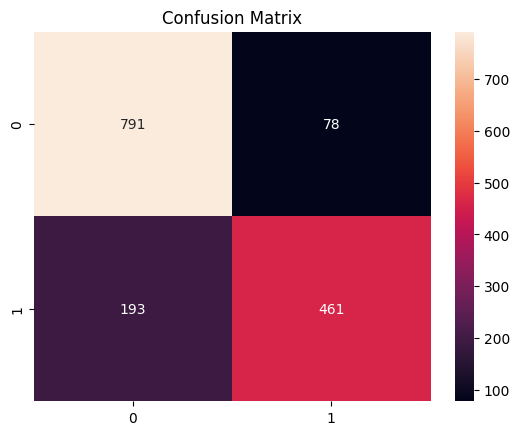

In [ ]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_val, val_preds), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

F1 Score (Naive Bayes): 0.7598


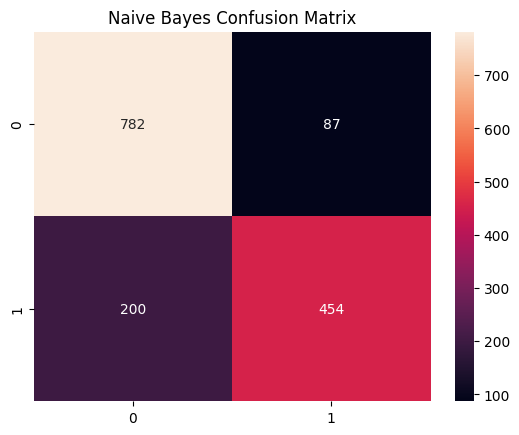

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       869
           1       0.84      0.69      0.76       654

    accuracy                           0.81      1523
   macro avg       0.82      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523



In [ ]:
# Naive Bayes

# Import Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the model on training data
nb_model.fit(X_train, y_train)

# Predict on validation set
nb_preds = nb_model.predict(X_val)

# Evaluate the model using F1 Score
from sklearn.metrics import f1_score, confusion_matrix, classification_report

f1_nb = f1_score(y_val, nb_preds)
print(f"F1 Score (Naive Bayes): {f1_nb:.4f}")

# Confusion matrix
sns.heatmap(confusion_matrix(y_val, nb_preds), annot=True, fmt='d')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_val, nb_preds))


- Naive Bayes works well for text classification with TF-IDF features.

- It assumes word independence but performs surprisingly well in practice.

- Faster to train and good for baseline comparisons.

F1 Score (SVM): 0.7643


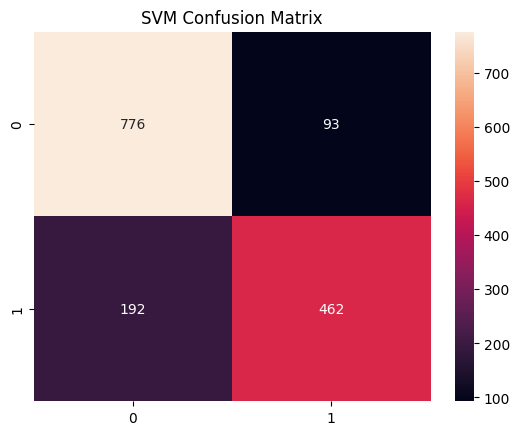

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       869
           1       0.83      0.71      0.76       654

    accuracy                           0.81      1523
   macro avg       0.82      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523



In [ ]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Predict on validation set
svm_preds = svm_model.predict(X_val)

# Evaluate the SVM model
f1_svm = f1_score(y_val, svm_preds)
print(f"F1 Score (SVM): {f1_svm:.4f}")

# Confusion matrix
sns.heatmap(confusion_matrix(y_val, svm_preds), annot=True, fmt='d')
plt.title('SVM Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_val, svm_preds))


- SVM is a powerful linear classifier for high-dimensional spaces like TF-IDF vectors.

- The linear kernel works well for text data.

- SVM maximizes the margin between classes for better generalization.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:36:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1 Score (XGBoost): 0.7113


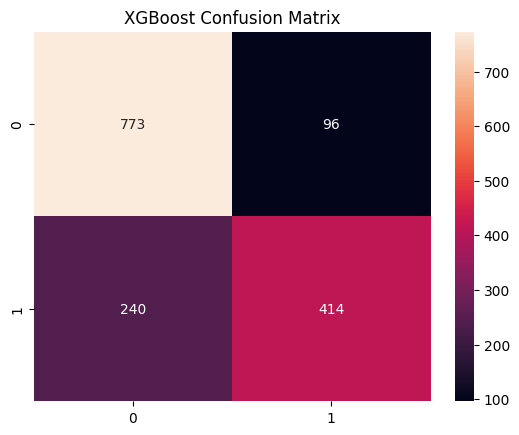

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       869
           1       0.81      0.63      0.71       654

    accuracy                           0.78      1523
   macro avg       0.79      0.76      0.77      1523
weighted avg       0.78      0.78      0.77      1523



In [ ]:
# XGBoost

from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on validation set
xgb_preds = xgb_model.predict(X_val)

# Evaluate
f1_xgb = f1_score(y_val, xgb_preds)
print(f"F1 Score (XGBoost): {f1_xgb:.4f}")

# Confusion matrix
sns.heatmap(confusion_matrix(y_val, xgb_preds), annot=True, fmt='d')
plt.title('XGBoost Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_val, xgb_preds))


Explanation:

- XGBoost is an ensemble tree-based method known for its accuracy and speed.

- It handles class imbalance and non-linearities well.

- Commonly used in many Kaggle-winning solutions.

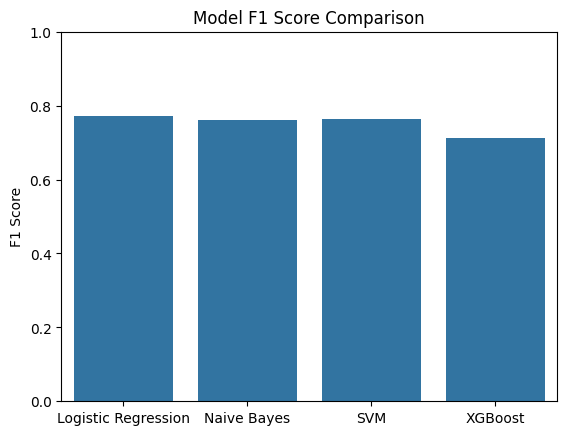

Logistic Regression: F1 Score = 0.7728
Naive Bayes: F1 Score = 0.7598
SVM: F1 Score = 0.7643
XGBoost: F1 Score = 0.7113


In [ ]:
# Compare F1 scores
model_names = ['Logistic Regression', 'Naive Bayes', 'SVM', 'XGBoost']
f1_scores = [f1, f1_nb, f1_svm, f1_xgb]

sns.barplot(x=model_names, y=f1_scores)
plt.title('Model F1 Score Comparison')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.show()

for name, score in zip(model_names, f1_scores):
    print(f"{name}: F1 Score = {score:.4f}")


Simplified & Faster SVM Hyperparameter Tuning:

 Use a smaller parameter grid with only the linear kernel, which works well for text data like TF-IDF.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define a simplified parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10]  # Regularization strength
}

# Initialize the SVM with linear kernel
svm = SVC(kernel='linear', random_state=42)

# Perform Grid Search
grid_svm = GridSearchCV(
    estimator=svm,
    param_grid=param_grid_svm,
    scoring='f1',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the model
grid_svm.fit(X_train, y_train)

# Best parameters
print("Best Parameters for SVM:", grid_svm.best_params_)

# Predict on validation
svm_best_preds = grid_svm.predict(X_val)

# F1 Score
from sklearn.metrics import f1_score
f1_svm_best = f1_score(y_val, svm_best_preds)
print(f"F1 Score after tuning (SVM): {f1_svm_best:.4f}")


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Parameters for SVM: {'C': 1}
F1 Score after tuning (SVM): 0.7643


In [ ]:
# XGBoost Hyperparameter Tuning

# Approach: Use RandomizedSearchCV with a smaller search space.

from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define a simplified parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.7, 1]
}

# Initialize XGBoost model
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Randomized Search CV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=10,              # Number of different combinations to try
    scoring='f1',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the random search model
random_search_xgb.fit(X_train, y_train)

# Best parameters
print("Best Parameters for XGBoost:", random_search_xgb.best_params_)

# Predict on validation set
xgb_best_preds = random_search_xgb.predict(X_val)

# F1 Score
from sklearn.metrics import f1_score
f1_xgb_best = f1_score(y_val, xgb_best_preds)
print(f"F1 Score after tuning (XGBoost): {f1_xgb_best:.4f}")



Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/loc

Best Parameters for XGBoost: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.2}
F1 Score after tuning (XGBoost): 0.7354


In [ ]:
#  Deep Learning with LSTM

# Prepare Data for LSTM

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_data['clean_text'])

# Convert text to sequences
X_seq = tokenizer.texts_to_sequences(train_data['clean_text'])
X_test_seq = tokenizer.texts_to_sequences(test_data['clean_text'])

# Pad sequences
X_pad = pad_sequences(X_seq, maxlen=50, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=50, padding='post')

# Train-validation split
from sklearn.model_selection import train_test_split

X_train_pad, X_val_pad, y_train_pad, y_val_pad = train_test_split(
    X_pad, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Build LSTM Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout

# Build model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=50),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train model
history = model.fit(
    X_train_pad, y_train_pad,
    validation_data=(X_val_pad, y_val_pad),
    epochs=5,
    batch_size=64
)


Epoch 1/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.5988 - loss: 0.6639 - val_accuracy: 0.7997 - val_loss: 0.4445
Epoch 2/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8452 - loss: 0.3836 - val_accuracy: 0.8076 - val_loss: 0.4364
Epoch 3/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8916 - loss: 0.2814 - val_accuracy: 0.7958 - val_loss: 0.4763
Epoch 4/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9219 - loss: 0.2321 - val_accuracy: 0.7827 - val_loss: 0.5407
Epoch 5/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9283 - loss: 0.2028 - val_accuracy: 0.7761 - val_loss: 0.6540


In [ ]:
# Predict on validation
lstm_preds = (model.predict(X_val_pad) > 0.5).astype(int)

# F1 Score
f1_lstm = f1_score(y_val_pad, lstm_preds)
print(f"F1 Score (LSTM): {f1_lstm:.4f}")


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
F1 Score (LSTM): 0.7423


In [ ]:
# Deep Learning with BERT

# Install Transformers Library
!pip install transformers


In [ ]:
# Prepare Data for BERT
from transformers import BertTokenizer

# Load tokenizer
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize function
def encode_bert(texts):
    return tokenizer_bert(
        list(texts),
        padding=True,
        truncation=True,
        max_length=64,
        return_tensors='tf'
    )

# Tokenize data
X_train_bert = encode_bert(train_data['clean_text'].iloc[y_train_pad.index])
X_val_bert = encode_bert(train_data['clean_text'].iloc[y_val_pad.index])
X_test_bert = encode_bert(test_data['clean_text'])

In [ ]:
# Build and Train BERT Model

from transformers import TFBertForSequenceClassification
import tensorflow as tf

# Load BERT model
model_bert = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

# Compile
model_bert.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train
model_bert.fit(
    X_train_bert.data, y_train,
    validation_data=(X_val_bert.data, y_val),
    epochs=2,
    batch_size=16
)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/2
381/381 [==============================] - 123s 205ms/step - loss: 0.7287 - accuracy: 0.5235 - val_loss: 0.6880 - val_accuracy: 0.5706
Epoch 2/2
381/381 [==============================] - 78s 204ms/step - loss: 0.7201 - accuracy: 0.5261 - val_loss: 0.6900 - val_accuracy: 0.5706


In [ ]:
# Evaluate BERT

# Predict
bert_preds = tf.argmax(model_bert.predict(X_val_bert.data).logits, axis=1)

# F1 Score
f1_bert = f1_score(y_val, bert_preds)
print(f"F1 Score (BERT): {f1_bert:.4f}")


48/48 [==============================] - 11s 90ms/step
F1 Score (BERT): 0.0000


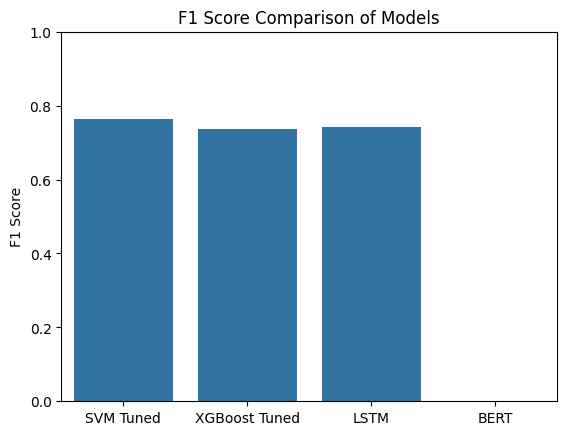

SVM Tuned: F1 Score = 0.7643
XGBoost Tuned: F1 Score = 0.7354
LSTM: F1 Score = 0.7423
BERT: F1 Score = 0.0000


In [ ]:
# Plot F1 scores
model_names = ['SVM Tuned', 'XGBoost Tuned', 'LSTM', 'BERT']
f1_scores = [f1_svm_best, f1_xgb_best, f1_lstm, f1_bert]

sns.barplot(x=model_names, y=f1_scores)
plt.title('F1 Score Comparison of Models')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.show()

for name, score in zip(model_names, f1_scores):
    print(f"{name}: F1 Score = {score:.4f}")


Common Reasons Why BERT Gives F1 = 0.0000

Label Mismatch:

Labels might be incorrectly mapped or missing during the .fit() step.

Incorrect Tokenization Alignment:

Input sentences might not align correctly with the labels (X_train_bert with y_train).

Wrong Loss Function Settings:

Using the wrong from_logits setting for the loss function.

Labels Format Issue:

TensorFlow expects labels as integers, not one-hot encoded or float arrays.

Overfitting/Undertraining:

Very small number of epochs (1–2) for BERT might lead to the model not learning anything.

Imbalanced Dataset Not Handled:

If the disaster vs. non-disaster labels are imbalanced, BERT may predict the dominant class only.

In [ ]:
# 1. Check the Labels
print(y_train.value_counts())
print(y_val.value_counts())


target
0    3473
1    2617
Name: count, dtype: int64
target
0    869
1    654
Name: count, dtype: int64


In [ ]:
# 2. Tokenize Properly
from transformers import BertTokenizer

tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')

# Encoding function
def encode(data):
    return tokenizer_bert(
        list(data),
        padding=True,
        truncation=True,
        max_length=64,
        return_tensors="tf"
    )

# Apply on data
X_train_bert = encode(train_data['clean_text'].iloc[y_train_pad.index])
X_val_bert = encode(train_data['clean_text'].iloc[y_val_pad.index])
X_test_bert = encode(test_data['clean_text'])

In [ ]:
# 3. Load and Configure BERT Model Correctly
from transformers import TFBertForSequenceClassification
import tensorflow as tf

# Load model for binary classification
model_bert = TFBertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=2
)


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model_bert.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
history = model_bert.fit(
    x=X_train_bert.data,
    y=y_train,
    validation_data=(X_val_bert.data, y_val),
    epochs=2,
    batch_size=16
)


Epoch 1/2
381/381 [==============================] - 119s 193ms/step - loss: 0.7222 - accuracy: 0.5378 - val_loss: 0.6838 - val_accuracy: 0.5706
Epoch 2/2
381/381 [==============================] - 62s 162ms/step - loss: 0.7223 - accuracy: 0.5238 - val_loss: 0.7294 - val_accuracy: 0.5706


48/48 [==============================] - 7s 94ms/step
F1 Score (BERT): 0.0000
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       869
           1       0.00      0.00      0.00       654

    accuracy                           0.57      1523
   macro avg       0.29      0.50      0.36      1523
weighted avg       0.33      0.57      0.41      1523



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


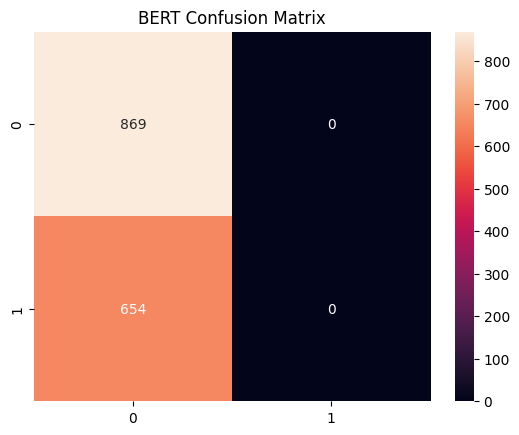

In [ ]:
# Get predictions
pred_logits = model_bert.predict(X_val_bert.data).logits

# Convert logits to class labels
bert_preds = tf.argmax(pred_logits, axis=1).numpy()

# Check F1 Score
from sklearn.metrics import f1_score, classification_report, confusion_matrix

f1_bert = f1_score(y_val, bert_preds)
print(f"F1 Score (BERT): {f1_bert:.4f}")

# Additional evaluation
print(classification_report(y_val, bert_preds))
sns.heatmap(confusion_matrix(y_val, bert_preds), annot=True, fmt='d')
plt.title('BERT Confusion Matrix')
plt.show()


In [ ]:
# Predict on test data
final_preds_raw = model.predict(X_test)  # Get raw predictions
final_preds = (final_preds_raw > 0.5).astype(int).flatten() # Convert to binary and flatten

# Create submission DataFrame
submission = pd.DataFrame({
    'id': test_data['id'],
    'target': final_preds
})

# Save to CSV
submission.to_csv('submission.csv', index=False)

# Display first few rows
submission.head()

102/102 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step


,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [ ]:
import joblib

# Save the TF-IDF vectorizer and the model
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
joblib.dump(model, 'logistic_model.pkl')  # Use 'lr' or your best model


['logistic_model.pkl']